In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [178]:
Dev_df = pd.read_csv("C:/Users/loris/Desktop/Project ER/Develop Ind.csv")
HDI_df = pd.read_csv("C:/Users/loris/Desktop/Project ER/human-development-index.csv")


In [179]:
HDI_df
HDI_df.shape

(5923, 4)

In [180]:
#i'm watching the stucture of the dataset
HDI_df.head()
print(HDI_df.tail())
HDI_df[5890:5923]
HDI_df.info()

        Entity Code  Year  Human Development Index
5918  Zimbabwe  ZWE  2017                    0.594
5919  Zimbabwe  ZWE  2018                    0.602
5920  Zimbabwe  ZWE  2019                    0.601
5921  Zimbabwe  ZWE  2020                    0.600
5922  Zimbabwe  ZWE  2021                    0.593
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5923 entries, 0 to 5922
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   5923 non-null   object 
 1   Code                     5603 non-null   object 
 2   Year                     5923 non-null   int64  
 3   Human Development Index  5923 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 185.2+ KB


In [181]:
#i'm watching the stucture of the dataset
Dev_df.head()
Dev_df.info()
print(Dev_df.shape)
Dev_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6655 entries, 0 to 6654
Data columns (total 57 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Country Name                                                                                           6652 non-null   object 
 1   Country Code                                                                                           6650 non-null   object 
 2   Time                                                                                                   6650 non-null   float64
 3   Time Code                                                                                              6650 non-null   object 
 4   Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                    

,Country Name,Country Code,Time,Time Code,Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD],Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",...,"Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6],Surface area (sq. km) [AG.SRF.TOTL.K2],"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]
6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6653,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6654,Last Updated: 12/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
Glob_df = Dev_df.copy()
Glob_df.rename(columns={"Country Code": "Code"}, inplace=True)
Glob_df.rename(columns={"Time": "Year"}, inplace=True)

In [183]:
#I tried change type of Year column before the merge, but i can't for Nan
Glob_df.isnull().sum()
Glob_df[6645:6655]

,Country Name,Code,Year,Time Code,Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD],Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Consumer price index (2010 = 100) [FP.CPI.TOTL],"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",...,"Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6],Surface area (sq. km) [AG.SRF.TOTL.K2],"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]",Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN],Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS]
6645,World,WLD,2018.0,YR2018,..,27747000000,..,0.244465922682497,..,24.0005235602094,...,50.3153108944173,2.2352388374351,1525.14905010327,134627209.182,64.1199308252945,1.47400076017666,1.43138591397975,3.75679319335029,4.12928145527479,2.48444490542153
6646,World,WLD,2019.0,YR2019,..,27443000000,..,0.184136146546094,..,19.7759162303665,...,50.3081407578818,2.31155921067228,..,134725642.514,64.715262402012,1.38529872922998,1.35101476012157,3.77415436992569,4.14938317690655,2.13539857189219
6647,World,WLD,2020.0,YR2020,..,23320000000,..,0.144820387786694,..,..,...,50.2948196395522,2.49168211685821,..,134732038.315,65.2641487099283,1.35298230965981,1.36348244342479,4.29758070560122,4.54327875225854,1.46453859990474
6648,World,WLD,2021.0,YR2021,..,26540000000,..,0.262040813565189,..,..,...,50.2776758409845,2.71192656212256,..,140486936.909,63.9688548634094,1.40195907882602,1.41048498733681,4.86302391635145,5.30214304764037,3.02947686313513
6649,World,WLD,2022.0,YR2022,..,31739000000,..,..,..,..,...,50.2647173965581,..,..,..,..,1.32866140371674,1.28208099632635,4.25557953405654,4.74993052271817,..
6650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6653,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6654,Last Updated: 12/18/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
Glob_df[5424:6656]
#watching Nan Data i noticed that there are also some aggregate of geographics areas
#so i'm deleting all the rows under the last country in the dataset
Glob_df.drop(Glob_df.index[5425:6656], inplace=True)

In [185]:
print(Glob_df.shape)
print(HDI_df.shape)

(5425, 57)
(5923, 4)


In [186]:
#now i change the type of Year in Glob_df to have the same type of HDI_df
Glob_df["Year"] = Glob_df["Year"].astype(int)

print(f"{Glob_df.columns}\n{HDI_df.columns}")

Index(['Country Name', 'Code', 'Year', 'Time Code',
       'Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]',
       'Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]',
       'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
       'Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
       'Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]',
       'Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]',
       'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
       'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
       'Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.

In [187]:
Glob_df = Glob_df.set_index(["Code", "Year"])
HDI_df = HDI_df.set_index(["Code", "Year"])

In [188]:
print(HDI_df)
print(Glob_df)

                Entity  Human Development Index
Code Year                                      
AFG  1990  Afghanistan                    0.273
     1991  Afghanistan                    0.279
     1992  Afghanistan                    0.287
     1993  Afghanistan                    0.297
     1994  Afghanistan                    0.292
...                ...                      ...
ZWE  2017     Zimbabwe                    0.594
     2018     Zimbabwe                    0.602
     2019     Zimbabwe                    0.601
     2020     Zimbabwe                    0.600
     2021     Zimbabwe                    0.593

[5923 rows x 2 columns]
          Country Name Time Code  \
Code Year                          
AFG  1998  Afghanistan    YR1998   
     1999  Afghanistan    YR1999   
     2000  Afghanistan    YR2000   
     2001  Afghanistan    YR2001   
     2002  Afghanistan    YR2002   
...                ...       ...   
ZWE  2018     Zimbabwe    YR2018   
     2019     Zimbabwe    Y

In [189]:
#I controll the null values before the merge
print(f"{Glob_df.isnull().sum()}\n{HDI_df.isnull().sum()}")

Country Name                                                                                             0
Time Code                                                                                                0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                             0
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                             0
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                            0
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                0
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                          0
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                0
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                       0
Current health expenditure (% of GDP)

In [190]:
print(HDI_df[5855:5940])

             Entity  Human Development Index
Code Year                                   
YEM  2018     Yemen                    0.459
     2019     Yemen                    0.461
     2020     Yemen                    0.460
     2021     Yemen                    0.455
ZMB  1990    Zambia                    0.412
...             ...                      ...
ZWE  2017  Zimbabwe                    0.594
     2018  Zimbabwe                    0.602
     2019  Zimbabwe                    0.601
     2020  Zimbabwe                    0.600
     2021  Zimbabwe                    0.593

[68 rows x 2 columns]


In [191]:
#I do the merge and lose the HDI_df's rows without correspondence with Glob_df
Glob_df = Glob_df.merge(HDI_df["Human Development Index"], left_index=True, right_index=True, how='left')

#I controll the Nan created with the merge
Glob_df["Human Development Index"].isnull().value_counts()

Human Development Index
False    4410
True     1015
Name: count, dtype: int64

In [192]:
HDI_nan_countries = Glob_df.groupby("Code")["Human Development Index"].agg(lambda x : x.isnull().sum())
HDI_nan_countries

Code
ABW    25
AFG     1
AGO     2
ALB     1
AND     3
       ..
XKX    25
YEM     1
ZAF     1
ZMB     1
ZWE     1
Name: Human Development Index, Length: 217, dtype: int64

In [193]:
#i'm watching how many countries have no data for the HDI
HDI_nan_countries[HDI_nan_countries == 25].index
#This country code there were not in HDI_df.I controlled with ex. HDI_df.loc["SXM"], HDI_df.loc["GUM"]

Index(['ABW', 'ASM', 'BMU', 'CHI', 'CUW', 'CYM', 'FRO', 'GIB', 'GRL', 'GUM',
       'IMN', 'MAC', 'MAF', 'MCO', 'MNP', 'NCL', 'NRU', 'PRI', 'PRK', 'PYF',
       'SOM', 'SXM', 'TCA', 'VGB', 'VIR', 'XKX'],
      dtype='object', name='Code')

In [194]:
#The others country with Nan Values is for dismatch beetween years in the two merged dataset
#(every country have at least one because the year 2022 there was not in the HDI_df ), 
#so i decided to mantain only country with <4 Nan that i can manage sobstituing Nan while a prediction of the values
HDI_df.loc["AGO"]
HDI_df.loc["GNB"]
HDI_df.loc["AND"]

,Entity,Human Development Index
Year,,
2000,Andorra,0.818
2001,Andorra,0.825
2002,Andorra,0.832
2003,Andorra,0.841
2004,Andorra,0.833
2005,Andorra,0.833
2006,Andorra,0.848
2007,Andorra,0.847
2008,Andorra,0.850


In [195]:
#i decided to delete countries with more than 3 Nan so i control which they are
HDI_too_nan = HDI_nan_countries[(HDI_nan_countries > 3)]

#i control the countris with too many nan values in the HDI column
HDI_too_nan.index

Index(['ABW', 'ASM', 'ATG', 'BMU', 'BTN', 'CHI', 'CUW', 'CYM', 'ERI', 'FRO',
       'GIB', 'GNB', 'GRD', 'GRL', 'GUM', 'IMN', 'KNA', 'LBN', 'MAC', 'MAF',
       'MCO', 'MHL', 'MNE', 'MNP', 'NCL', 'NGA', 'NRU', 'PRI', 'PRK', 'PSE',
       'PYF', 'SMR', 'SOM', 'SSD', 'SUR', 'SXM', 'TCA', 'TKM', 'TLS', 'VGB',
       'VIR', 'VUT', 'XKX'],
      dtype='object', name='Code')

In [196]:
#i create the mask of the countries that i want mantain
HDI_few_nan = HDI_nan_countries[HDI_nan_countries <= 3]
HDI_few_nan

Code
AFG    1
AGO    2
ALB    1
AND    3
ARE    1
      ..
WSM    1
YEM    1
ZAF    1
ZMB    1
ZWE    1
Name: Human Development Index, Length: 174, dtype: int64

In [197]:
#i take these countries applying the boolean mask
Glob_df2 = Glob_df[Glob_df.index.get_level_values("Code").isin(HDI_few_nan.index)]

Glob_df2.isna().sum()

Country Name                                                                                               0
Time Code                                                                                                  0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                               0
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                               0
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                              0
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                  0
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                            0
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                  0
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                         0
Current health expe

In [198]:
#A function to interpolate the nan data for each country, i want use this comand because it's easy to use and with time series 
#work better than mean or other way.
#Filling Nan using a linear method, with a determinated limit , it's like a crossed control, 
#because before use this function, maybe i could left some country with some nan.
#Moreover limit_direction = "both" so the interpolation work in both the side of the values in the coloumn
def interpolate_country_nan(df, column_name, limit=None):

    for code in df.index.get_level_values("Code").unique():
        country_data = df.loc[code][column_name]
        
        country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)

In [199]:
interpolate_country_nan(Glob_df2,"Human Development Index", limit=3)

C:\Users\loris\AppData\Local\Temp\ipykernel_14260\258047043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [200]:
Glob_df2.isna().sum()

Country Name                                                                                             0
Time Code                                                                                                0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                             0
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                             0
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                            0
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                0
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                          0
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                0
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                       0
Current health expenditure (% of GDP)

In [201]:
#Replace dots with NaN throughout the dataframe, too estimate the real number of Nan in the others columns
Glob_df2.replace("..", np.nan, inplace=True)

Glob_df2.isna().sum()

C:\Users\loris\AppData\Local\Temp\ipykernel_14260\4217402179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Glob_df2.replace("..", np.nan, inplace=True)


Country Name                                                                                                0
Time Code                                                                                                   0
Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]                                             3290
Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]                                             1691
Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                            2991
Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                                                 329
Consumer price index (2010 = 100) [FP.CPI.TOTL]                                                           305
Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]                1653
Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]                       3951
Current he

In [202]:
print(Glob_df2.columns)
#i drop columns that i'm sure to don't use
columns_to_drop = ["Country Name", "Time Code", "Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]",
"Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]", "Consumer price index (2010 = 100) [FP.CPI.TOTL]",
"Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]",
"Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]",
"Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]",
"Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]", "Gross savings (% of GDP) [NY.GNS.ICTR.ZS]", 
"Human capital index (HCI) (scale 0-1) [HD.HCI.OVRL]", "Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]", 
"Services, value added (% of GDP) [NV.SRV.TOTL.ZS]", "Literacy rate, adult total (% of people ages 15 and above) [SE.ADT.LITR.ZS]",
"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]", "Interest payments (% of expense) [GC.XPN.INTP.ZS]",
"Researchers in R&D (per million people) [SP.POP.SCIE.RD.P6]", "Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]",
"Labor force, total [SL.TLF.TOTL.IN]", "Land area (sq. km) [AG.LND.TOTL.K2]",
"Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]", "Fossil fuel energy consumption (% of total) [EG.USE.COMM.FO.ZS]",
"Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN]", "Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN]",
"Population, female (% of total population) [SP.POP.TOTL.FE.ZS]", "Population, male (% of total population) [SP.POP.TOTL.MA.ZS]",
"Agricultural raw materials imports (% of merchandise imports) [TM.VAL.AGRI.ZS.UN]", 
"Agricultural raw materials exports (% of merchandise exports) [TX.VAL.AGRI.ZS.UN]", "Surface area (sq. km) [AG.SRF.TOTL.K2]",
"GDP (current US$) [NY.GDP.MKTP.CD]"]

Glob_df2 = Glob_df2.drop(columns=columns_to_drop)

Index(['Country Name', 'Time Code',
       'Arms exports (SIPRI trend indicator values) [MS.MIL.XPRT.KD]',
       'Arms imports (SIPRI trend indicator values) [MS.MIL.MPRT.KD]',
       'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
       'Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
       'Cost of business start-up procedures, female (% of GNI per capita) [IC.REG.COST.PC.FE.ZS]',
       'Coverage of social insurance programs (% of population) [per_si_allsi.cov_pop_tot]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Current education expenditure, total (% of total expenditure in public institutions) [SE.XPD.CTOT.ZS]',
       'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
       'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
       'Expense (% of GDP) [GC.XPN.TOTL.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Fo

In [203]:
Glob_df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4350 entries, ('AFG', 1998) to ('ZWE', 2022)
Data columns (total 26 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                  4021 non-null   object 
 1   Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                  3592 non-null   object 
 2   Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                  3845 non-null   object 
 3   Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                4151 non-null   object 
 4   Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                3606 non-null   object 
 5   Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                3751 non-null   object 
 6   GDP (constant 2015 US$) [NY.GDP.MKT

In [204]:
print(Glob_df2.columns)

Index(['Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]',
       'Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]',
       'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
       'Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]',
       'Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]',
       'Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]',
       'GDP (constant 2015 US$) [NY.GDP.MKTP.KD]', 'Gini index [SI.POV.GINI]',
       'Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]',
       'Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]',
       'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
       'Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]',
       'Manufactures imports (% of merchandise imports) [TM.VAL.MANF.ZS.UN]',
       'Merchandise exports (current US$) [TX.VAL.MRCH.CD.WT]',
       'Merchandise imports (current US$) [TM.VAL.MRCH.CD.WT]',
       'Merchandise trade (% of GDP) [

In [205]:
#I'm getting an idea of ​​the countries with missing values ​​in the key indices for my analysis
GDP2015_mask = Glob_df2.groupby("Code")["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"].agg(lambda x : x.isnull().sum())
GDP2015_mask[GDP2015_mask != 0]

Code
AFG     5
DJI    15
LBR     2
LBY     1
LIE    24
PLW     3
QAT     2
STP     3
SYR     1
TON     1
VEN    25
YEM     4
Name: GDP (constant 2015 US$) [NY.GDP.MKTP.KD], dtype: int64

In [206]:
#I choose less than 5 Nan for country
GDP2015_few_nan = GDP2015_mask[GDP2015_mask < 5]

Glob_df2 = Glob_df2[Glob_df2.index.get_level_values("Code").isin(GDP2015_few_nan.index)]

In [207]:
Glob_df2.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     290
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                     720
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     434
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                   183
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   664
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   528
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                       17
Gini index [SI.POV.GINI]                                                     2692
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    1140
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     434
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        273
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]           542
Manufactures imp

In [208]:
Glob_df3 = Glob_df2.copy()

In [209]:
#The code selects columns with data type "object" and then applies the pd.to_numeric function to convert to numeric format.
#This helps in transforming non-numeric data to numeric, replacing non-convertible values with NaN.

columns_to_convert = Glob_df3.columns[Glob_df3.dtypes == "object"]
Glob_df3[columns_to_convert] = Glob_df3[columns_to_convert].apply(pd.to_numeric)

In [210]:
Glob_df3.isna().sum() == Glob_df2.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                    True
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                    True
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                    True
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                  True
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                  True
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                  True
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                     True
Gini index [SI.POV.GINI]                                                     True
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    True
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                    True
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                       True
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]          True
Manufactures imp

In [211]:
#I putted this command after the command for change data from type 'object' to numbers
interpolate_country_nan(Glob_df3,"GDP (constant 2015 US$) [NY.GDP.MKTP.KD]", limit=4)

C:\Users\loris\AppData\Local\Temp\ipykernel_14260\258047043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [212]:
Glob_df3.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     290
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                     720
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                     434
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                   183
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                   664
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                   528
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                        0
Gini index [SI.POV.GINI]                                                     2692
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]    1140
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                     434
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                        273
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]           542
Manufactures imp

In [213]:
Glob_df3.index

MultiIndex([('AGO', 1998),
            ('AGO', 1999),
            ('AGO', 2000),
            ('AGO', 2001),
            ('AGO', 2002),
            ('AGO', 2003),
            ('AGO', 2004),
            ('AGO', 2005),
            ('AGO', 2006),
            ('AGO', 2007),
            ...
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016),
            ('ZWE', 2017),
            ('ZWE', 2018),
            ('ZWE', 2019),
            ('ZWE', 2020),
            ('ZWE', 2021),
            ('ZWE', 2022)],
           names=['Code', 'Year'], length=4250)

In [214]:
#I'm plotting all countries, for each code (coutry) i show the values during the period
def plot_all_countries(dataframe, column_name):
    data = dataframe[column_name]
    plt.figure(figsize=(15, 8))

    for code, country_data in data.groupby("Code"):
        plt.plot(country_data.index.get_level_values("Year"), country_data.values, label=code)

    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} (1998-2022)")
    plt.grid()

    plt.show()

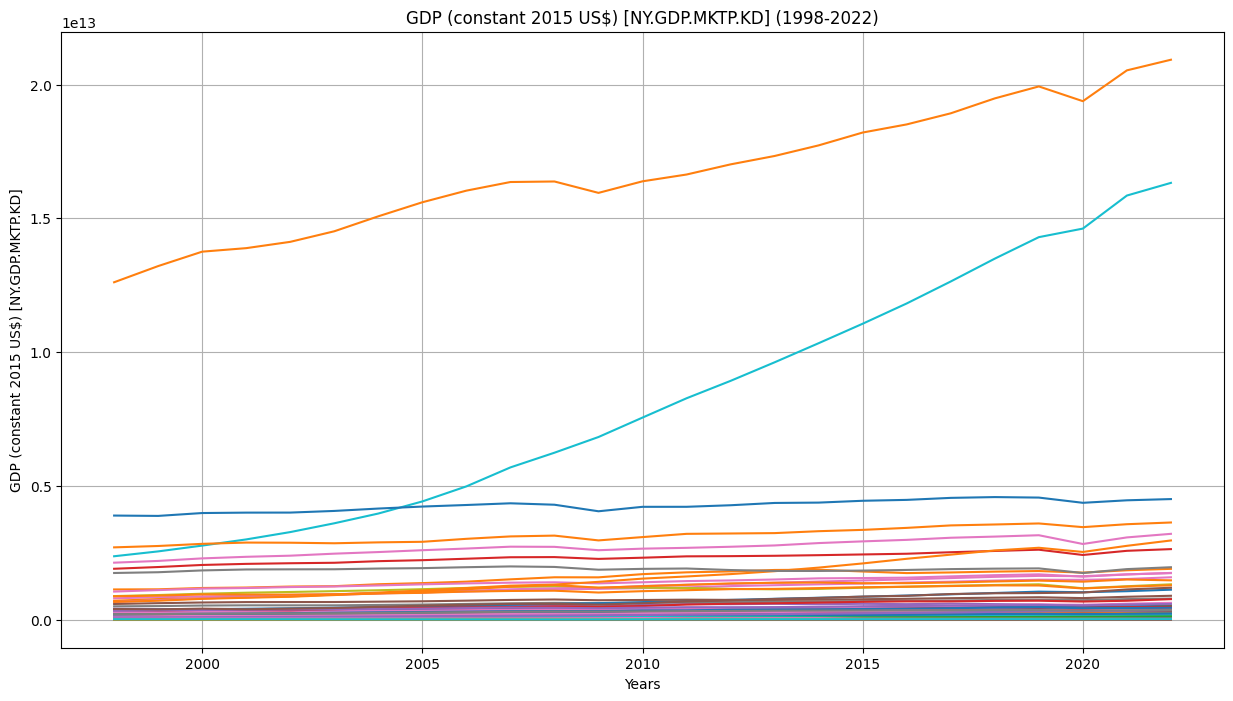

In [215]:
plot_all_countries(Glob_df3, "GDP (constant 2015 US$) [NY.GDP.MKTP.KD]")

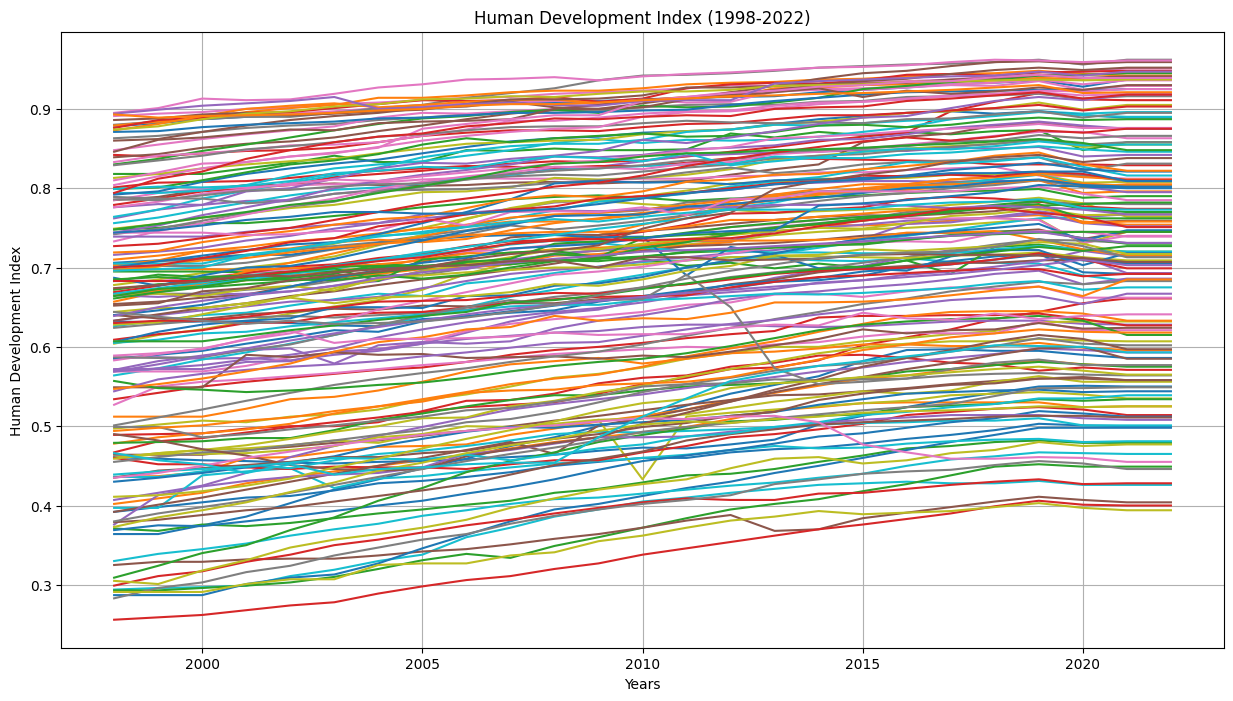

In [216]:
plot_all_countries(Glob_df3, "Human Development Index")

In [217]:
Glob_df3["Population, total [SP.POP.TOTL]"].isna().sum()

0

In [218]:
#i'm removing countries with population too small (the mean during the period), misleading for the analyses
average_pop = Glob_df3.groupby("Code")["Population, total [SP.POP.TOTL]"].mean()

enough_pop_mask = average_pop[average_pop > 300000]

average_pop[average_pop < 300000]


Code
AND     73467.72
BRB    273525.76
DMA     69505.12
FSM    110481.92
KIR    107680.68
LCA    170053.16
PLW     18710.92
STP    181619.00
SYC     89602.36
TON    105464.40
TUV     10410.24
VCT    109231.88
WSM    197319.68
Name: Population, total [SP.POP.TOTL], dtype: float64

In [219]:
#I selected the countries with more than 300000 of population
Glob_df3 = Glob_df3[Glob_df3.index.get_level_values("Code").isin(enough_pop_mask.index)]

In [220]:
#I want create a column GDP pro capita, but taking inflation into account

Glob_df3["GDP_pc"] = Glob_df3["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"] / Glob_df3["Population, total [SP.POP.TOTL]"]

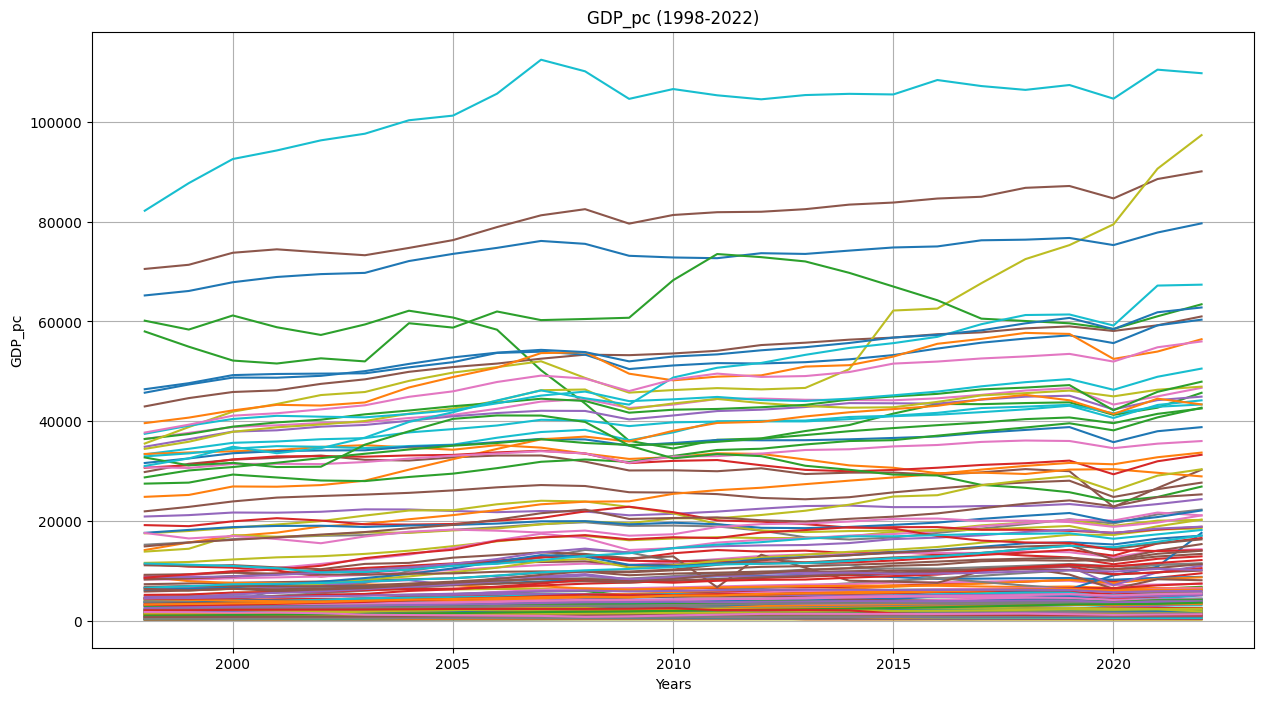

In [221]:
plot_all_countries(Glob_df3, "GDP_pc")

In [222]:
#watching the 10 highest gdp per capita in the world (year 2022)
gdp_pc_2022 = Glob_df3.loc[Glob_df3.index.get_level_values("Year") == 2022, "GDP_pc"]
top_gdp_pc_2022 = gdp_pc_2022.nlargest(10)

print(top_gdp_pc_2022)

Code  Year
LUX   2022    109714.924316
IRL   2022     97316.877509
CHE   2022     90057.035942
NOR   2022     79636.274550
SGP   2022     67359.789878
QAT   2022     63428.364091
USA   2022     62789.127921
AUS   2022     60993.641250
DNK   2022     60345.557318
ISL   2022     56429.299782
Name: GDP_pc, dtype: float64


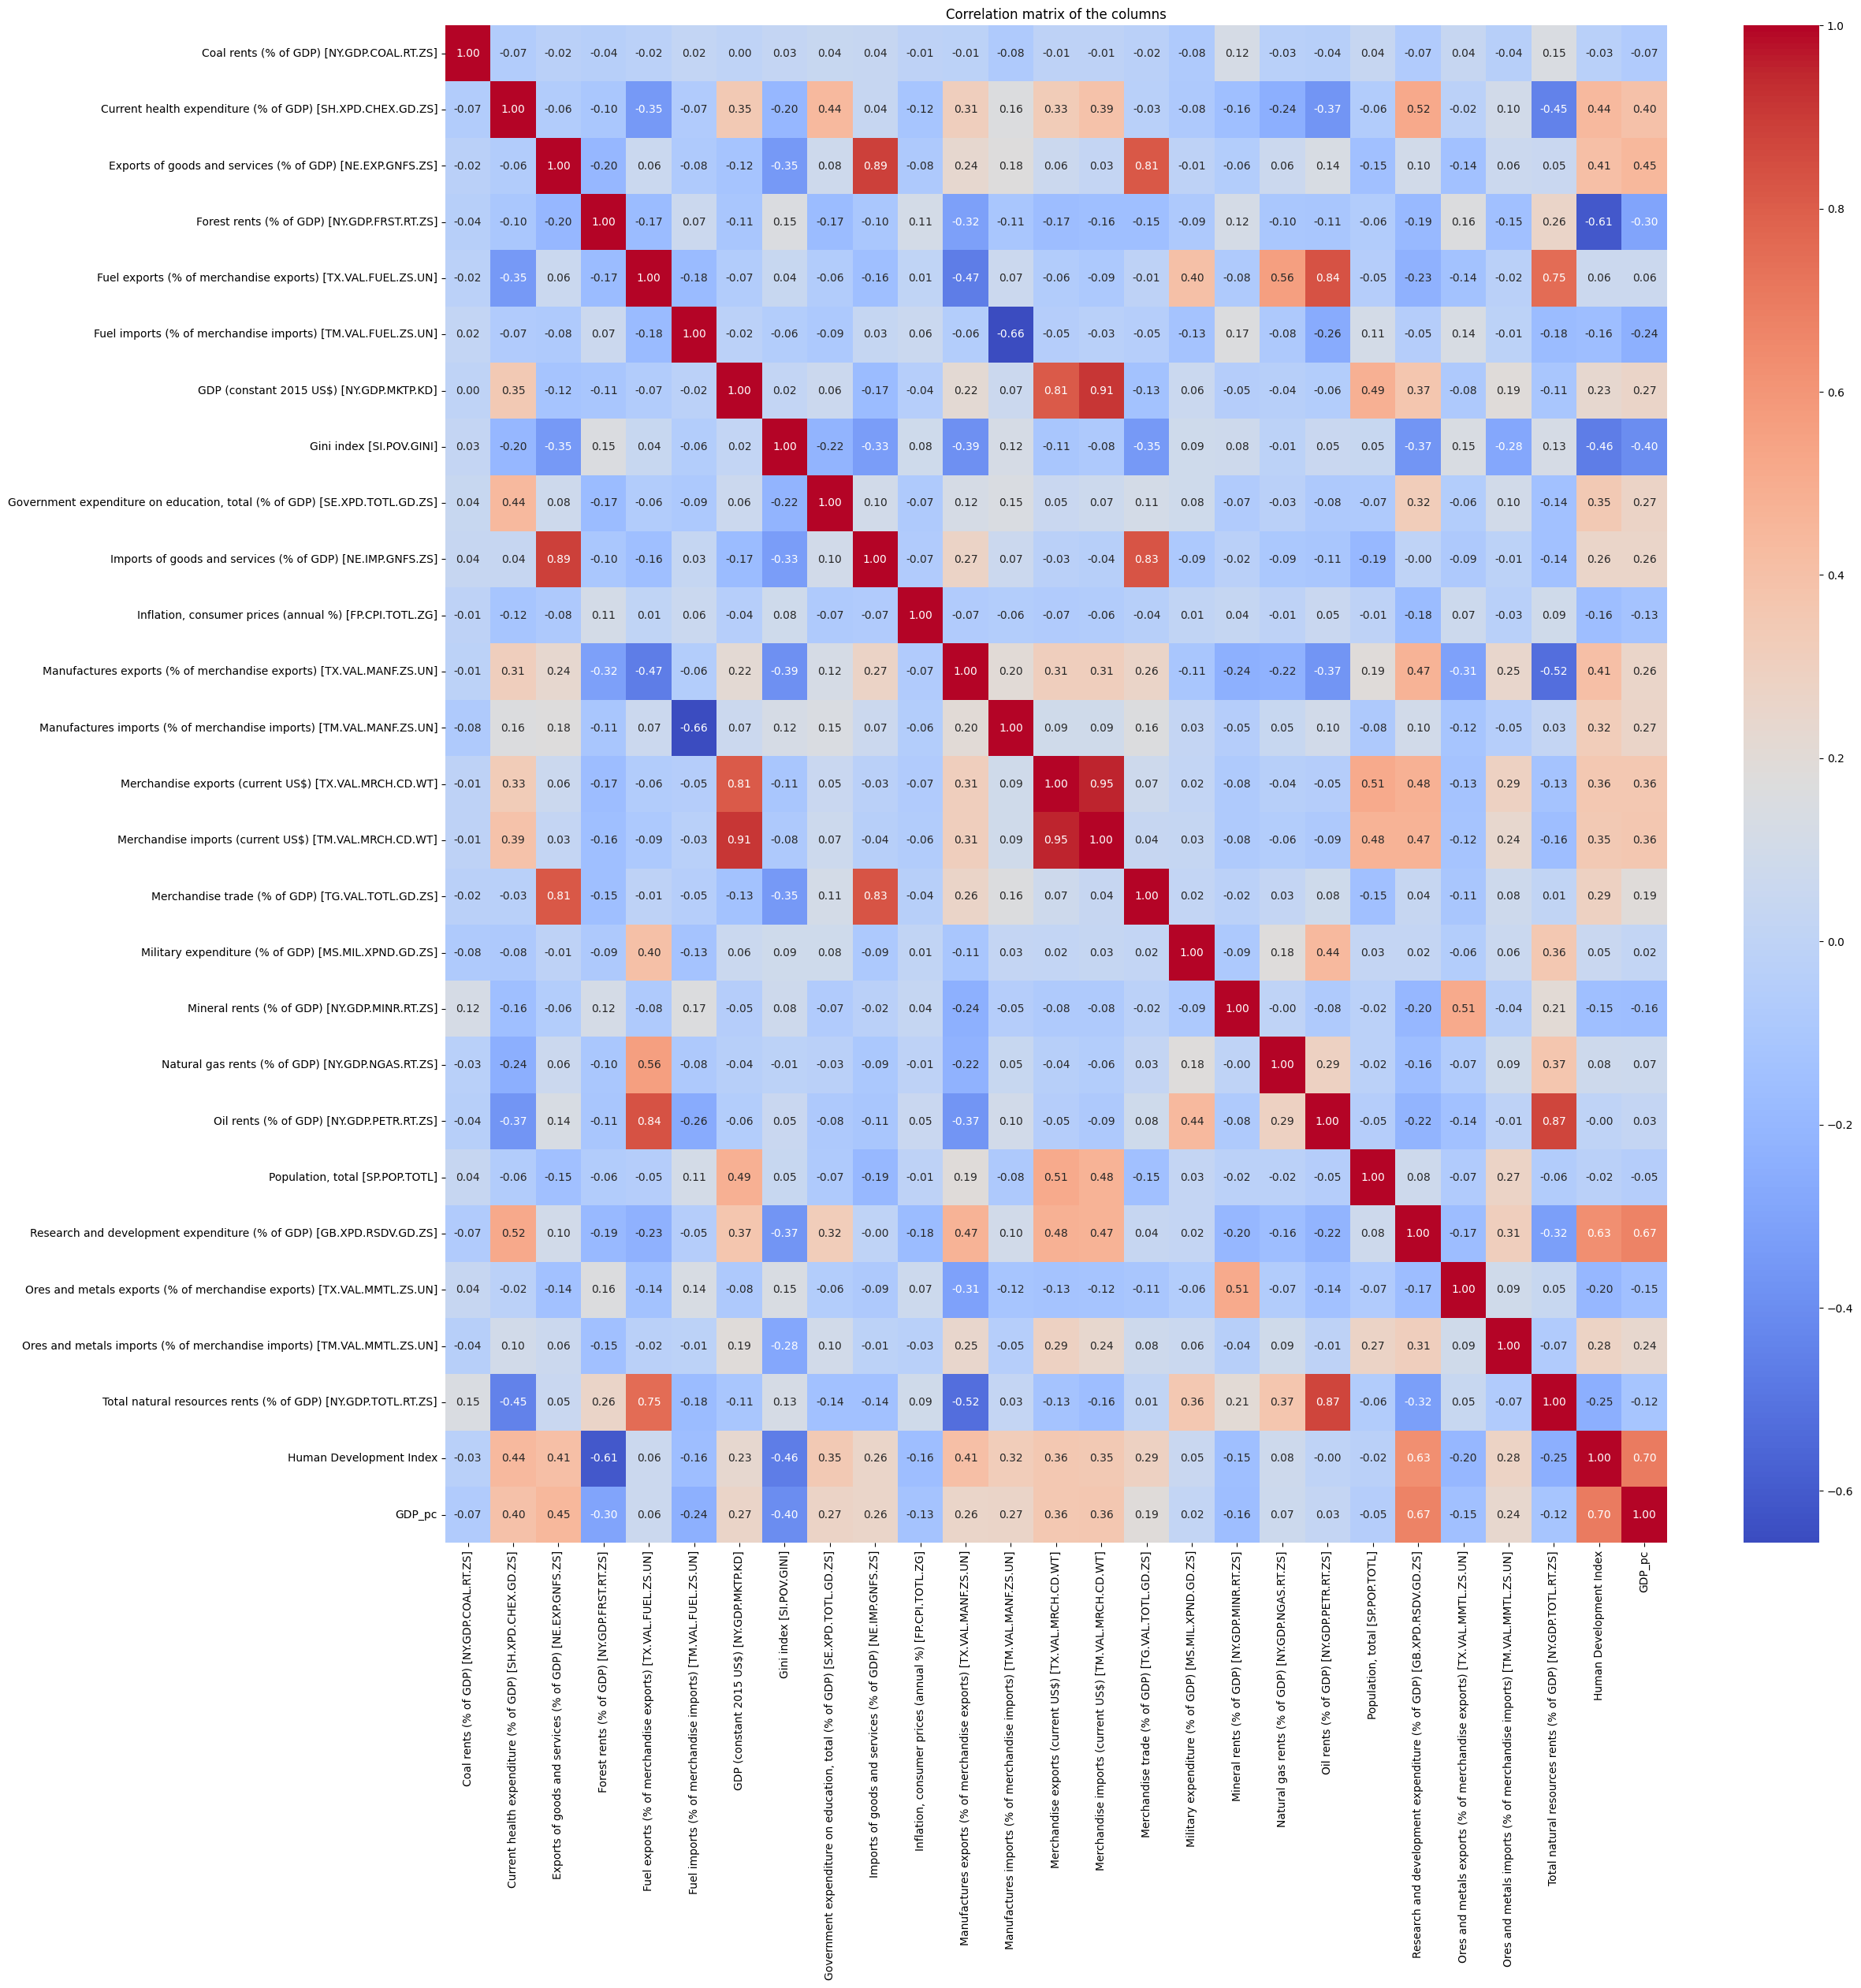

In [223]:
#I'm visualizing the correlation matrix of the coloumns
import seaborn as sns

correlation_matrix = Glob_df3.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation matrix of the columns")
plt.show()

In [224]:
#I want select the first 13 country of GDP (constant 2015 US$)"
sorted_22_gdp_df = Glob_df3.loc[Glob_df3.index.get_level_values("Year") == 2022].sort_values(by="GDP (constant 2015 US$) [NY.GDP.MKTP.KD]", ascending=False)
top_gdp9_countries = sorted_22_gdp_df.head(9) #i will use this for the line graph of the gdp performance
top_gdp_countries = sorted_22_gdp_df.head(13) #i will use it for the dataset useful for the graphs
print(top_gdp_countries.index.get_level_values("Code"))


Index(['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'IND', 'FRA', 'ITA', 'BRA', 'CAN',
       'KOR', 'AUS', 'RUS'],
      dtype='object', name='Code')


In [225]:
#The new dataset with all the values and coloumns for each country
GDP_cons_df = Glob_df3.loc[Glob_df3.index.get_level_values("Code").isin(top_gdp_countries.index.get_level_values("Code"))]
GDP_cons_df


Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]  \
Code Year                                              
AUS  1998                                   0.175056   
     1999                                   0.107427   
     2000                                   0.184104   
     2001                                   0.634982   
     2002                                   0.402755   
...                                              ...   
USA  2018                                   0.198370   
     2019                                   0.131587   
     2020                                   0.083695   
     2021                                   0.165542   
     2022                                        NaN   

           Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]  \
Code Year                                                              
AUS  1998                                                NaN           
     1999                                                NaN           
     2000                                           7.599617           
     2001                                           7.682723           
     2002                                           7.878076           
...                                                      ...           
USA  2018                                          16.640944           
     2019                                          16.676474           
     2020                                          18.815826           
     2021                                                NaN           
     2022                                                NaN           

           Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]  \
Code Year                                                              
AUS  1998                                          19.557566           
     1999                                          18.294744           
     2000                                          19.390228           
     2001                                          22.152326           
     2002                                          20.726661           
...                                                      ...           
USA  2018                                          12.360989           
     2019                                          11.872470           
     2020                                          10.202126           
     2021                                          10.892727           
     2022                                                NaN           

           Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]  \
Code Year                                                
AUS  1998                                     0.189067   
     1999                                     0.160988   
     2000                                     0.177575   
     2001                                     0.197341   
     2002                                     0.190275   
...                                                ...   
USA  2018                                     0.034627   
     2019                                     0.038216   
     2020                                     0.036796   
     2021                                     0.037713   
     2022                                          NaN   

           Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]  \
Code Year                                                                
AUS  1998                                          17.919705             
     1999                                          18.253798             
     2000                                          20.894653             
     2001                                          20.763263             
     2002                                          20.688588             
...                                                      ...             
USA  2018                                          13.529994 

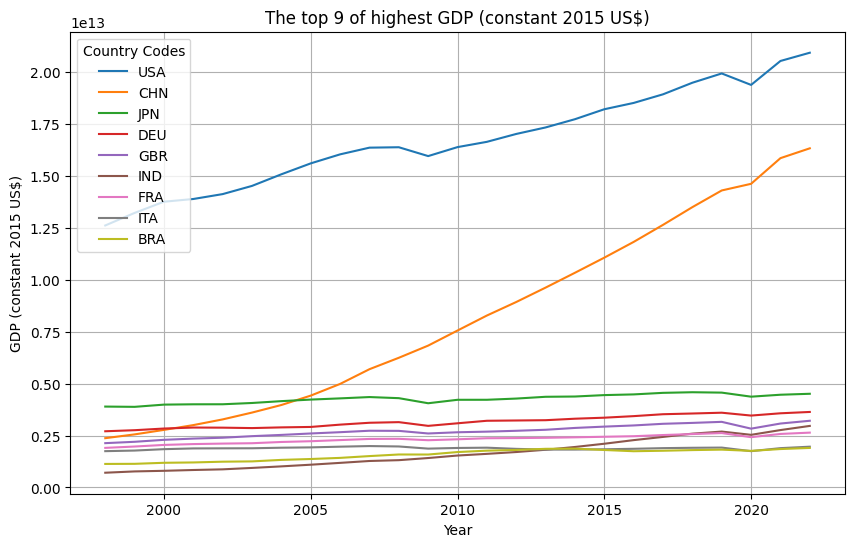

In [226]:
# Create line graph for GDP over time for the top 9 countries with highest military expenditure (% of GDP) in 2022 among the biggest
#country considering the gdp in 2022
plt.figure(figsize=(10, 6))

for country_code in top_gdp9_countries.index.get_level_values("Code").unique():
    country_data = GDP_cons_df.loc[country_code, "GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"]
    years = country_data.index.get_level_values("Year")
    plt.plot(years, country_data, label=country_code)

plt.xlabel("Year")
plt.ylabel("GDP (constant 2015 US$)")
plt.title("The top 9 of highest GDP (constant 2015 US$)")
plt.legend(title='Country Codes', loc='upper left')
plt.grid()
plt.show()

In [227]:
GDP_cons_df_2022 = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2022]
GDP_cons_df_2022

,,Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS],Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS],Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS],Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN],Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN],GDP (constant 2015 US$) [NY.GDP.MKTP.KD],Gini index [SI.POV.GINI],"Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]",Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],...,Mineral rents (% of GDP) [NY.GDP.MINR.RT.ZS],Natural gas rents (% of GDP) [NY.GDP.NGAS.RT.ZS],Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS],"Population, total [SP.POP.TOTL]",Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS],Ores and metals exports (% of merchandise exports) [TX.VAL.MMTL.ZS.UN],Ores and metals imports (% of merchandise imports) [TM.VAL.MMTL.ZS.UN],Total natural resources rents (% of GDP) [NY.GDP.TOTL.RT.ZS],Human Development Index,GDP_pc
Code,Year,,,,,,,,,,,,,,,,,,,,,
AUS,2022,NaN,NaN,25.427124,NaN,42.695466,15.287693,1.586173e+12,NaN,NaN,19.709620,...,NaN,NaN,NaN,26005540,NaN,30.175770,1.571438,NaN,0.951,60993.641250
BRA,2022,NaN,NaN,20.045537,NaN,16.997788,17.784873,1.901461e+12,NaN,NaN,19.294455,...,NaN,NaN,NaN,215313498,NaN,11.948743,3.110280,NaN,0.754,8831.127729
CAN,2022,NaN,NaN,33.794717,NaN,32.507637,7.915522,1.749066e+12,NaN,4.139572,33.645938,...,NaN,NaN,NaN,38929902,NaN,7.685702,3.802198,NaN,0.936,44928.588759
CHN,2022,NaN,NaN,20.677002,NaN,1.790090,20.634362,1.632508e+13,NaN,NaN,17.466816,...,NaN,NaN,NaN,1412175000,NaN,1.512412,13.486386,NaN,0.768,11560.242122
DEU,2022,NaN,NaN,50.923930,NaN,3.548770,12.673718,3.633579e+12,NaN,NaN,48.956410,...,NaN,NaN,NaN,83797985,NaN,3.206150,4.851740,NaN,0.942,43361.177120
FRA,2022,NaN,NaN,34.686400,NaN,5.346252,18.799369,2.638407e+12,NaN,NaN,38.563453,...,NaN,NaN,NaN,67971311,NaN,2.550530,2.469031,NaN,0.903,38816.479280
GBR,2022,NaN,NaN,33.272204,NaN,12.380594,16.904209,3.209502e+12,NaN,NaN,35.983592,...,NaN,NaN,NaN,66971395,NaN,6.380270,3.196815,NaN,0.929,47923.482238
IND,2022,NaN,NaN,22.786882,NaN,21.752465,37.844404,2.961516e+12,NaN,NaN,26.442820,...,NaN,NaN,NaN,1417173173,NaN,3.726130,5.978370,NaN,0.633,2089.734383
ITA,2022,NaN,NaN,36.630293,NaN,4.978535,21.401583,1.961616e+12,NaN,NaN,38.146585,...,NaN,NaN,NaN,58940425,NaN,2.848467,5.124008,NaN,0.895,33281.336668


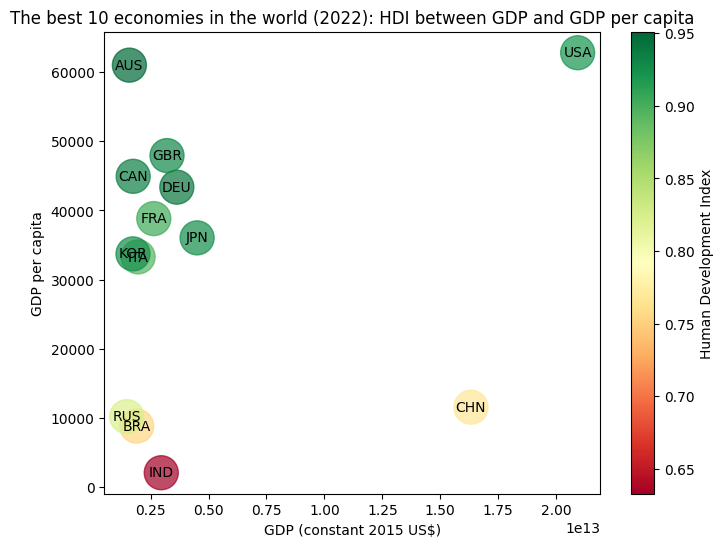

In [228]:

from matplotlib.cm import ScalarMappable

#Show the GDP per capita and Human Development Index for the best 10 economies in the world in the 2022
plt.figure(figsize=(8, 6))

scatter = plt.scatter(GDP_cons_df_2022["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"], GDP_cons_df_2022["GDP_pc"],
                      s=600, c=GDP_cons_df_2022["Human Development Index"],
                      cmap='RdYlGn', alpha=0.7, label='GDP')

#labels with country names for each point
for i, code in enumerate(GDP_cons_df_2022.index.get_level_values("Code")):
    plt.annotate(code,(GDP_cons_df_2022["GDP (constant 2015 US$) [NY.GDP.MKTP.KD]"].iloc[i], GDP_cons_df_2022["GDP_pc"].iloc[i]),
                 fontsize=10, ha='center',va='center',xytext=(0, 0), textcoords='offset points') 

plt.xlabel("GDP (constant 2015 US$)")
plt.ylabel("GDP per capita")
plt.title("The best 10 economies in the world (2022): HDI between GDP and GDP per capita")

#Color Bar
sm = ScalarMappable(cmap='RdYlGn')
sm.set_array(GDP_cons_df_2022["Human Development Index"])

#Position of the bar
cbar = plt.colorbar(sm, label='Human Development Index', orientation='vertical', ax=plt.gca())
cbar.set_label('Human Development Index')

plt.show()

In [229]:
GDP_cons_df.index

MultiIndex([('AUS', 1998),
            ('AUS', 1999),
            ('AUS', 2000),
            ('AUS', 2001),
            ('AUS', 2002),
            ('AUS', 2003),
            ('AUS', 2004),
            ('AUS', 2005),
            ('AUS', 2006),
            ('AUS', 2007),
            ...
            ('USA', 2013),
            ('USA', 2014),
            ('USA', 2015),
            ('USA', 2016),
            ('USA', 2017),
            ('USA', 2018),
            ('USA', 2019),
            ('USA', 2020),
            ('USA', 2021),
            ('USA', 2022)],
           names=['Code', 'Year'], length=325)

In [230]:
GDP_cons_df.isna().sum()

Coal rents (% of GDP) [NY.GDP.COAL.RT.ZS]                                     13
Current health expenditure (% of GDP) [SH.XPD.CHEX.GD.ZS]                     48
Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]                      1
Forest rents (% of GDP) [NY.GDP.FRST.RT.ZS]                                   13
Fuel exports (% of merchandise exports) [TX.VAL.FUEL.ZS.UN]                    1
Fuel imports (% of merchandise imports) [TM.VAL.FUEL.ZS.UN]                    1
GDP (constant 2015 US$) [NY.GDP.MKTP.KD]                                       0
Gini index [SI.POV.GINI]                                                     104
Government expenditure on education, total (% of GDP) [SE.XPD.TOTL.GD.ZS]     56
Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS]                      1
Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]                         1
Manufactures exports (% of merchandise exports) [TX.VAL.MANF.ZS.UN]            1
Manufactures imports (% of m

In [231]:
#I want select the first 9 country of Military expenditure (% of GDP) in 2022 among the biggest 9 countries in the world for gdp in 2022"
sorted_22_mil_df = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2022].sort_values(by="Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]", ascending=False)
top_mil_countries = sorted_22_mil_df.head(9)
print(top_mil_countries.index.get_level_values("Code"))

Index(['RUS', 'USA', 'KOR', 'IND', 'GBR', 'FRA', 'AUS', 'ITA', 'CHN'], dtype='object', name='Code')


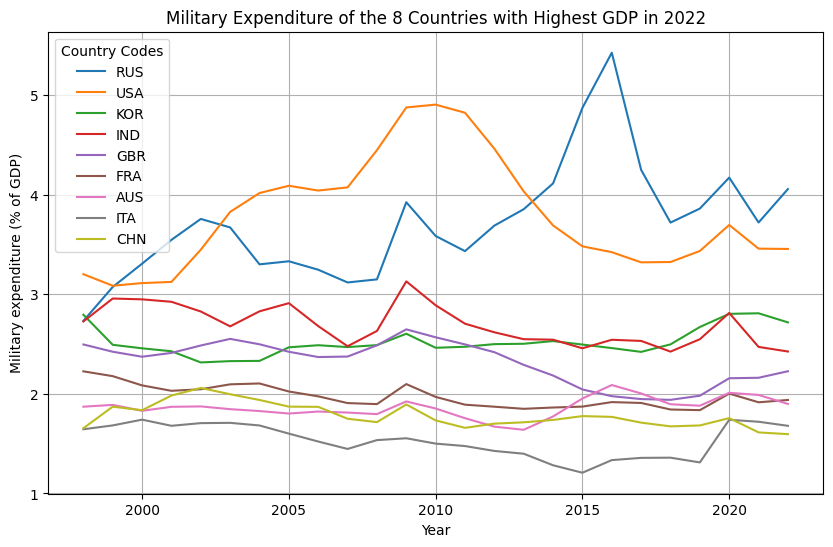

In [232]:
# Create line graph for military spending over time for the top 9 countries with highest military expenditure (% of GDP) in 2022 among the biggest
#country considering the gdp in 2022
plt.figure(figsize=(10, 6))

for country_code in top_mil_countries.index.get_level_values("Code").unique():
    country_data = GDP_cons_df.loc[country_code, "Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]"]
    years = country_data.index.get_level_values("Year")
    plt.plot(years, country_data, label=country_code)

plt.xlabel("Year")
plt.ylabel("Military expenditure (% of GDP)")
plt.title("Military Expenditure of the 8 Countries with Highest GDP in 2022")
plt.legend(title='Country Codes', loc='upper left')
plt.grid()
plt.show()


In [233]:
# Count of null values ​​of the column Research and development expenditure (% of GDP) for each country
null_values_by_country = GDP_cons_df.groupby("Code")["Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]"].apply(lambda x: x.isna().sum())
print(null_values_by_country)
GDP_cons_df.loc["AUS"]["Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]"]
#Nan for AUS present a distribution pretty spread out over the period, so I'll use interpolate on it too 

Code
AUS    13
BRA     4
CAN     1
CHN     1
DEU     1
FRA     1
GBR     1
IND     2
ITA     1
JPN     1
KOR     1
RUS     2
USA     1
Name: Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS], dtype: int64


Year
1998    1.51356
1999        NaN
2000    1.57320
2001        NaN
2002    1.74749
2003        NaN
2004    1.84902
2005        NaN
2006    2.18011
2007        NaN
2008    2.39995
2009        NaN
2010    2.37075
2011    2.23484
2012        NaN
2013    2.17843
2014        NaN
2015    1.92071
2016        NaN
2017    1.87977
2018        NaN
2019    1.82892
2020        NaN
2021        NaN
2022        NaN
Name: Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS], dtype: float64

In [234]:
interpolate_country_nan(GDP_cons_df,"Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]", limit=None)

C:\Users\loris\AppData\Local\Temp\ipykernel_14260\258047043.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data.interpolate(method="linear", limit=limit, limit_direction = "both", inplace =True)


In [235]:
#I want select the first 8 country of "Research and development expenditure (% of GDP)" in 2022 among the biggest 9 countries in the world for gdp in 2022"
sorted_22_rs_df = GDP_cons_df.loc[GDP_cons_df.index.get_level_values("Year") == 2022].sort_values(by="Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]", ascending=False)
top_rs_countries = sorted_22_rs_df.head(9)
print(top_rs_countries.index.get_level_values("Code"))

Index(['KOR', 'USA', 'JPN', 'DEU', 'GBR', 'CHN', 'FRA', 'AUS', 'CAN'], dtype='object', name='Code')


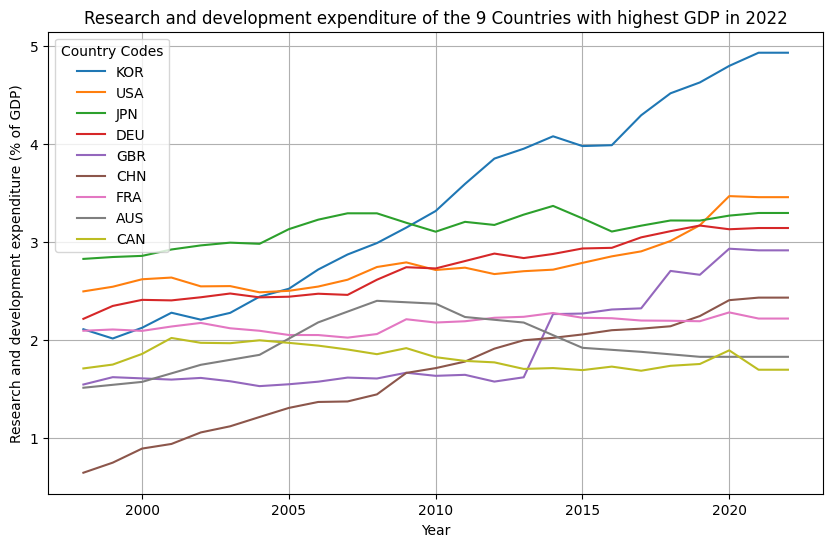

In [236]:
# Create line graph for military spending over time for the top 9 countries with highest military expenditure (% of GDP) in 2022 among the biggest
#country considering the gdp in 2022
plt.figure(figsize=(10, 6))

for country_code in top_rs_countries.index.get_level_values("Code").unique():
    country_data = GDP_cons_df.loc[country_code, "Research and development expenditure (% of GDP) [GB.XPD.RSDV.GD.ZS]"]
    years = country_data.index.get_level_values("Year")
    plt.plot(years, country_data, label=country_code)

plt.xlabel("Year")
plt.ylabel("Research and development expenditure (% of GDP)")
plt.title("Research and development expenditure of the 9 Countries with highest GDP in 2022")
plt.legend(title='Country Codes', loc='upper left')
plt.grid()
plt.show()